In [94]:
import numpy as np
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
df = pd.read_csv('/content/sample_data/spam.csv', encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [122]:
# dropping last three columns cause they contain most NaN values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [123]:
#renaming columns
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
encoder = LabelEncoder()

In [99]:
df['target'] = encoder.fit_transform(df['target'])

In [100]:
#ham == 0, #spam == 1
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
#checking for duplicate values and removing them
df.duplicated().sum()
df = df.drop_duplicates(keep='first')

In [102]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


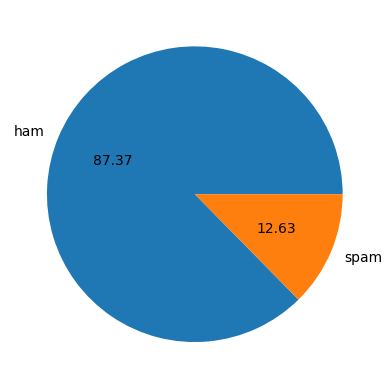

In [103]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [104]:
df['num_characters']= df['text'].apply(len)

In [105]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: xlabel='num_characters', ylabel='Count'>

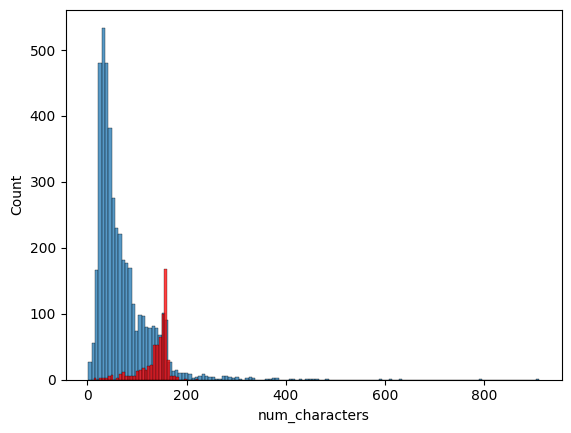

In [106]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

In [107]:
ps = PorterStemmer()
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)
 

print([transform("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."),ps.stem('loving')])

['gon na home soon want talk stuff anymor tonight k cri enough today', 'love']


In [108]:
df['transformed_text']=df['text'].apply(transform)

In [109]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

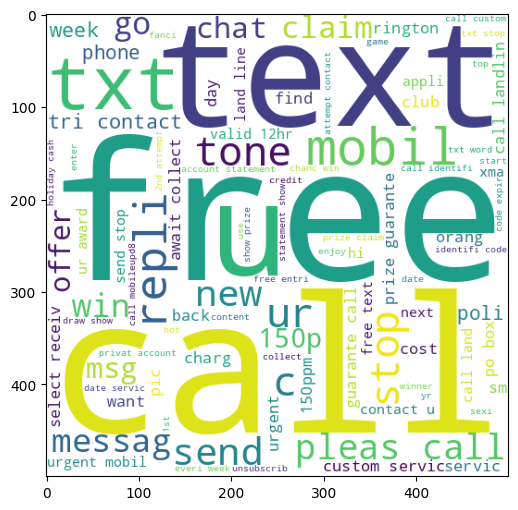

In [110]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

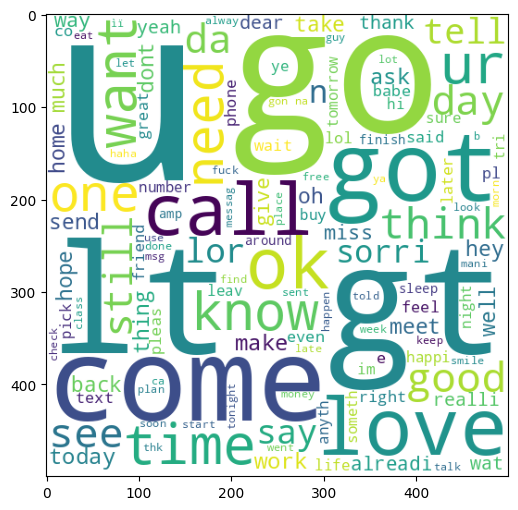

In [111]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [112]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True, max_features=3000)

In [113]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [114]:
y = df['target'].values

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [116]:
log = LogisticRegression()

In [117]:
log.fit(X_train, y_train)
y_pred0 = log.predict(X_test) 
print(accuracy_score(y_test,y_pred0))
print(precision_score(y_test,y_pred0))

0.9526112185686654
0.978494623655914


In [126]:
text = "I HAVE A DATE ON SUNDAY WITH WILL!!"
text1 = "Congratulations! You have been selected to win a prize!"
transformed_text, transformed_text1  = [transform(text)], [transform(text1)]
vectorizedText, vectorizedText1 = tfidf.transform(transformed_text), tfidf.transform(transformed_text1)
prediction, prediction1 = log.predict(vectorizedText)[0], log.predict(vectorizedText1)[0]
if (prediction == 0):
  print(['Not spam mail', text])

else:
  print(['Spam mail', text])

if (prediction1 == 0):
  print(['Not spam mail', text1])

else:
  print(['Spam mail', text1])


['Not spam mail', 'I HAVE A DATE ON SUNDAY WITH WILL!!']
['Spam mail', 'Congratulations! You have been selected to win a prize!']
